# Machine Learning

## Regressão Logistica

In [44]:
# import de modulos pandas e numpy
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Math
import math

# import de modulos para graficos
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# imports para Machine Learning 
from sklearn.linear_model import LogisticRegression
# from sklearn.cross_validation import train_test_split # modulo antigo
from sklearn.model_selection import train_test_split

# para avaliacao
from sklearn import metrics

# dataset
import statsmodels.api as sm

### Função logística

A função logistica [Logistic Function](http://en.wikipedia.org/wiki/Logistic_function) recebe como argumento uma valor de $-\infty$ a $+\infty$, e retorna um valor no intervalo $(0,1)$

$$ \sigma (t)= \frac{1}{1+e^{-t}}$$

Text(0.5,1,' Funcao Logistica ')

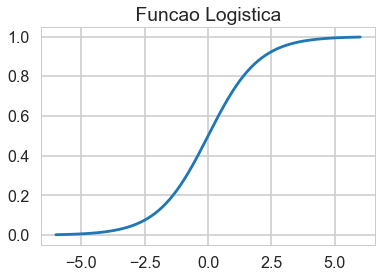

In [45]:
# Função Logistica
def logistic(t):
    return 1.0 / (1 + math.exp((-1.0)*t) )

# cria um grade de -6 a 6 ( 500 elementos, igualmente espaçados)
x_grade = np.linspace(-6,6,500)

# calcula os valores de y
y = np.array([logistic(x) for x in x_grade])

# usando exp do numpy que aceita um vetor como argumento
y = 1/(1 + np.exp(-1.0 * x_grade))

# plot
plt.plot(x_grade,y)
plt.title(' Funcao Logistica ')

A ideia é considerar a função logistica gerando uma probabilidade, a partir de um polinomio:


$$ y = a_0 + a_1.x_{1} + a_2.x_{2} ... + a_m.x_{m}$$

onde $a_0, a_1, ..., a_m$ são coeficientes a serem aprendidos, de forma que a equação abaixo:<br>


$$ F(x)= \frac{1}{1+e^{-(a_0 + a_1.x_{1} + a_2.x_{2} ... + a_m.x_{m})}}$$

forneça a 'melhor' probabilidade de sucesso. 

Para tanto o algoritmo procura encontrar os melhores $a_0, a_1, ..., a_m$ que minimizam o erro. 

Na predição, o $x^{(i)}$ fornece um $F(x^{(i)})$. 
* Se $F(x^{(i)}) \leq 0.5$, predição será a classe 0
* Se $F(x^{(i)}) > 0.5$, predição será a classe 1

### Exemplo prático

In [46]:
import webbrowser

url = 'http://statsmodels.sourceforge.net/stable/datasets/generated/fair.html'

webbrowser.open_new(url)

True

Quantidade de observações: 6366
Quantidade de features: 9
Definições:

    rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                    4 = good, 5 = very good
    age             : Age
    yrs_married     : No. years married. Interval approximations. See
                    original paper for detailed explanation.
    children        : No. children
    religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                    4 = strongly
    educ            : Level of education, 9 = grade school, 12 = high
                    school, 14 = some college, 16 = college graduate,
                    17 = some graduate school, 20 = advanced degree
    occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                    or unskilled worker; 3 = white-colloar; 4 = teacher
                    counselor social worker, nurse; artist, writers;
                    technician, skilled worker, 5 = managerial,
                    administrative, business, 6 = professional with
                    advanced degree
    occupation_husb : Husband's occupation. Same as occupation.
    affairs         : measure of time spent in extramarital affairs


In [47]:
# Carregando dataframe 

df = sm.datasets.fair.load_pandas().data

In [48]:
df.sample(5)

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
908             5.0  27.0          9.0       2.0        1.0  16.0         3.0   
4674            5.0  32.0          9.0       2.0        3.0  16.0         4.0   
658             5.0  27.0          2.5       0.0        3.0  14.0         5.0   
1145            2.0  22.0          2.5       0.0        2.0  12.0         3.0   
4991            5.0  27.0          2.5       0.0        3.0  14.0         4.0   

      occupation_husb   affairs  
908               5.0  1.361111  
4674              6.0  0.000000  
658               5.0  1.400000  
1145              5.0  4.799999  
4991              1.0  0.000000

In [49]:
# Define uma coluna, indicador binário que indica se a pessoa teve um caso extra-conjugal
df['teve_affair'] = [ 1 if a else 0 for a in df.affairs]

In [50]:
df.sample(5)

rate_marriage   age  yrs_married  children  religious  educ  occupation  \
6353            5.0  22.0          2.5       2.0        2.0  14.0         3.0   
3086            3.0  27.0          9.0       0.0        2.0  12.0         3.0   
5350            4.0  27.0          2.5       1.0        1.0  17.0         4.0   
1153            5.0  42.0         23.0       3.0        4.0  16.0         3.0   
5126            5.0  42.0         23.0       4.0        3.0  14.0         3.0   

      occupation_husb   affairs  teve_affair  
6353              5.0  0.000000            0  
3086              6.0  0.000000            0  
5350              4.0  0.000000            0  
1153              4.0  0.852174            1  
5126              5.0  0.000000            0

In [51]:
# Media por cada label
df.groupby('teve_affair').mean()

rate_marriage        age  yrs_married  children  religious  \
teve_affair                                                               
0                 4.329701  28.390679     7.989335  1.238813   2.504521   
1                 3.647345  30.537019    11.152460  1.728933   2.261568   

                  educ  occupation  occupation_husb   affairs  
teve_affair                                                    
0            14.322977    3.405286         3.833758  0.000000  
1            13.972236    3.463712         3.884559  2.187243

In [52]:
# desvio padrão por cada label
df.groupby('teve_affair').std()

rate_marriage       age  yrs_married  children  religious  \
teve_affair                                                              
0                 0.821099  6.809684     7.101994  1.417410   0.885117   
1                 1.065286  6.699997     7.185216  1.410401   0.840767   

                 educ  occupation  occupation_husb   affairs  
teve_affair                                                   
0            2.211409    0.930512         1.361392  0.000000  
1            2.086742    0.965927         1.314123  3.437478

In [53]:
sns.set_context('poster')

In [54]:
# sns.jointplot(data = df[df.affairs < 2], x = 'age', y = 'affairs')

In [55]:
df.affairs.describe(percentiles=[0, 0.9, 0.99])

count    6366.000000
mean        0.705374
std         2.203374
min         0.000000
0%          0.000000
50%         0.000000
90%         2.000000
99%         7.839996
max        57.599991
Name: affairs, dtype: float64

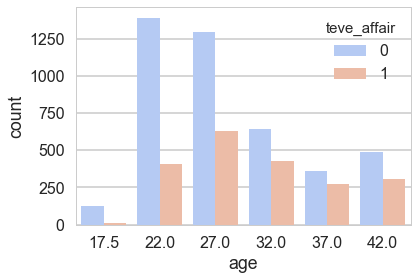

In [56]:
# Countplot com idade
sns.countplot(data=df, x='age', hue='teve_affair', palette='coolwarm')
# sns.distplot(df[df.teve_affair == 0].age)
# sns.distplot(df[df.teve_affair == 1].age)

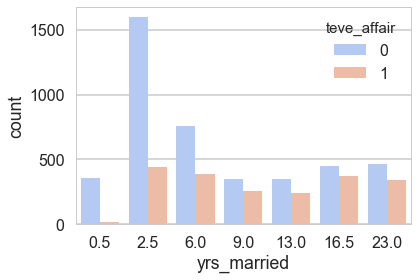

In [57]:
# Countplot com anos de casamento
sns.countplot('yrs_married',data=df,hue='teve_affair',palette='coolwarm')

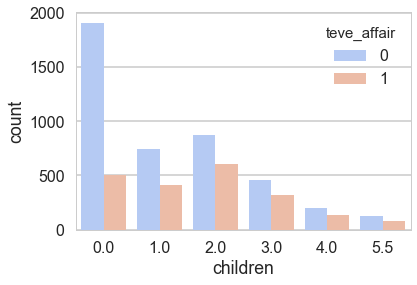

In [58]:
# Countplot com quantidade de filhos
sns.countplot('children',data=df,hue='teve_affair',palette='coolwarm')

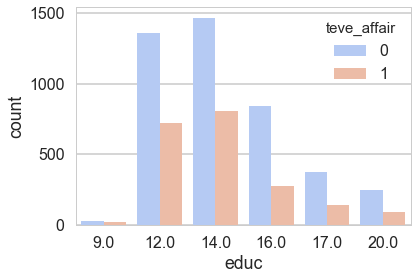

In [59]:
# Countplot com nivel de educação
sns.countplot('educ',data=df,hue='teve_affair',palette='coolwarm')

(0, 15)

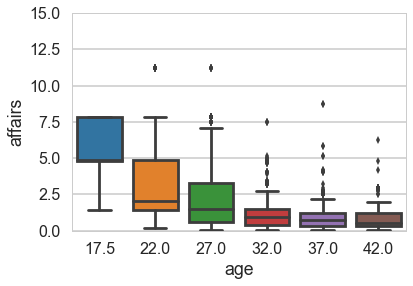

In [60]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por boxplot
sns.boxplot(data=df[df.affairs > 0], x='age', y = 'affairs')
plt.ylim(0, 15)

(-2, 12)

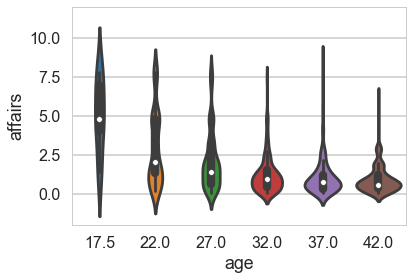

In [61]:
# considerando que a pessoa teve um caso extra-conjugal, 
# visualizacão da distribuição por violinplot
sns.violinplot(data=df[(df.affairs > 0) & (df.affairs < 9)], x='age', y = 'affairs')
plt.ylim(-2, 12)

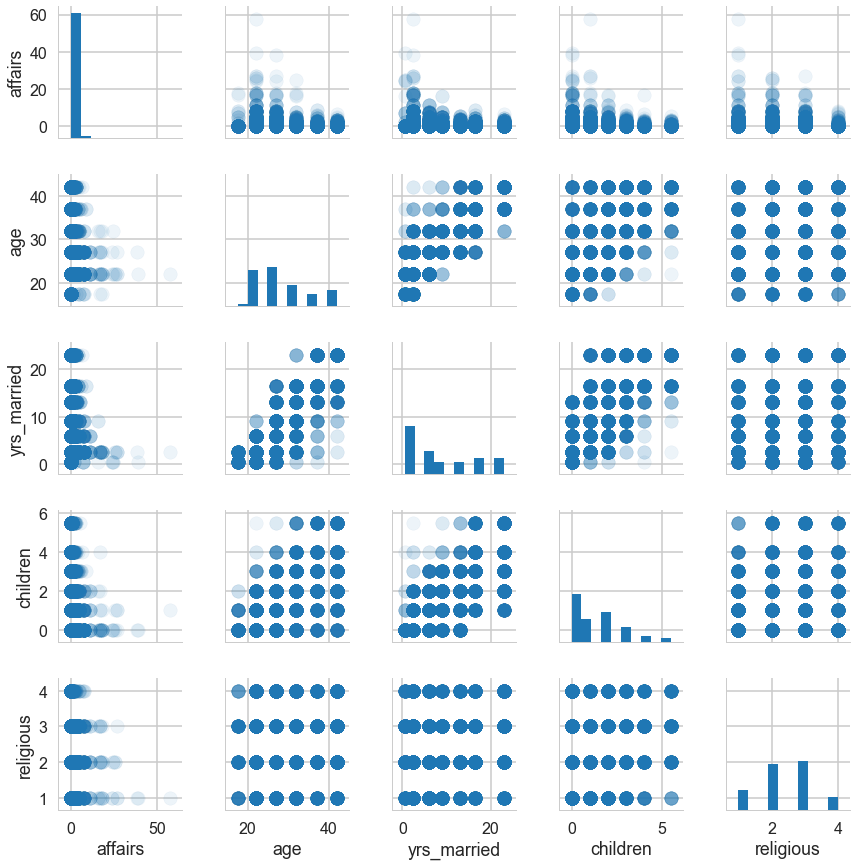

In [62]:
sns.pairplot(data=df[['affairs', 'age', 'yrs_married', 'children', 'religious']], 
        plot_kws = {'alpha':0.08, 's':180, 'edgecolor': None}, )

#### pre-processamento

Notamos as variaveis categoricas Occupation e Husband's Occupation. De maneira similar a regressão linear, precisamos tratar essas colunas. Nesse caso, fazemos um OHE (one hot encoding). Importante: Labelencoding não funciona!!

Pandas tem um método para criar esses [dummy variables](http://en.wikipedia.org/wiki/Dummy_variable_%28statistics%29) criando colunas dedicadas para cada valor encontrado.

In [63]:
# Cria novo DataFrame para as colunas categoricas
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()

1.0  2.0  3.0  4.0  5.0  6.0
0    0    1    0    0    0    0
1    0    0    1    0    0    0
2    0    0    1    0    0    0
3    0    0    0    0    1    0
4    0    0    1    0    0    0

In [64]:
# Atribui nomes as colunas
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

In [65]:
# Atribui X primeiramente sem as colunas categoricas 
X = df.drop(['occupation','occupation_husb','teve_affair'],axis=1)

# Concatena os dataframes dummies
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)

In [66]:
# Concatena o X com o dataframe dos dummies
X = pd.concat([X,dummies],axis=1)

# amostragem do X
X.sample(5)

rate_marriage   age  yrs_married  children  religious  educ  affairs  \
2194            5.0  22.0          0.5       0.0        4.0  16.0      0.0   
4390            2.0  27.0          2.5       1.0        3.0  12.0      0.0   
1763            3.0  27.0          6.0       1.0        3.0  16.0      2.0   
2786            5.0  22.0          2.5       0.0        2.0  17.0      0.0   
2880            2.0  32.0         13.0       2.0        3.0  12.0      0.0   

      occ1  occ2  occ3  occ4  occ5  occ6  hocc1  hocc2  hocc3  hocc4  hocc5  \
2194     0     0     0     0     0     1      0      1      0      0      0   
4390     0     1     0     0     0     0      0      1      0      0      0   
1763     0     1     0     0     0     0      0      1      0      0      0   
2786     0     0     1     0     0     0      0      1      0      0      0   
2880     0     0     1     0     0     0      0      0      0      1      0   

      hocc6  
2194      0  
4390      0  
1763      0  
2786      0  
2880      0

#### multicolinearidade

Notar que nos dataframe com as variaveis dummies, uma das colunas é combinação linear das outras.

Por exemplo, o valor da primeira coluna será igual a $1 - \sum_{i=2}^{k} x_i$, onde $x_i$ é o valor da coluna $i$ na mesma observação, e $k$ é a cardinalidade (quantidade de valores possíveis) da coluna categorica original.

Para remediar esse problema, bem simples, basta deletar uma das colunas.

In [67]:
# deletando uma coluna para cada coluna categorica
X = X.drop('occ1',axis=1)
X = X.drop('hocc1',axis=1)

# deletando coluna não utilizada
X = X.drop('affairs',axis=1)

# amostragem
X.sample(5)

rate_marriage   age  yrs_married  children  religious  educ  occ2  occ3  \
623             4.0  22.0          2.5       2.0        3.0  12.0     1     0   
3985            4.0  42.0         23.0       3.0        2.0  12.0     0     1   
1182            4.0  32.0         16.5       2.0        3.0  14.0     0     1   
4009            4.0  22.0          2.5       1.0        3.0  12.0     1     0   
983             5.0  32.0         16.5       1.0        3.0  12.0     0     1   

      occ4  occ5  occ6  hocc2  hocc3  hocc4  hocc5  hocc6  
623      0     0     0      1      0      0      0      0  
3985     0     0     0      0      0      1      0      0  
1182     0     0     0      0      0      1      0      0  
4009     0     0     0      1      0      0      0      0  
983      0     0     0      1      0      0      0      0

#### alternativa
Por razões didáticas o roteiro acima foi apresentado, mas todo ele pode ser resumido em apenas uma linha:

In [68]:
# X = pd.get_dummies(df, columns=['occupation', 'occupation_husb'], 
#                    drop_first=True).drop(['affairs', 'teve_affair'], axis = 1)

#### separando o vetor y 
Agora que já temos a matriz com as features definidas, vamos retirar a coluna resposta em um vetor a parte ($y$)

In [69]:
# Atribui y a coluna teve_affair
y = df.teve_affair

# amostragem do y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: teve_affair, dtype: int64

In [70]:
# transformando em numpy
y = y.values

# checando resultado
y

array([1, 1, 1, ..., 0, 0, 0])

In [71]:
y[3683]

0

#### Rodando Regressão Logistica com sklearn 

In [72]:
# Instanciando objeto
log_model = LogisticRegression()

# Treinando o modelo
log_model.fit(X, y)

# Checando acurácia
log_model.score(X, y)

0.7258875274897895

In [73]:
# Checando a percentagem de pessoas com casos extra-conjugais
y.mean()

0.3224945020420987

In [74]:
# coeff_df = DataFrame(X.columns, np.transpose(list(log_model.coef_))))

In [75]:
coeff_df = DataFrame(log_model.coef_)

coeff_df.columns = X.columns

coeff_df = coeff_df.T

coeff_df.columns = ['coeficiente']

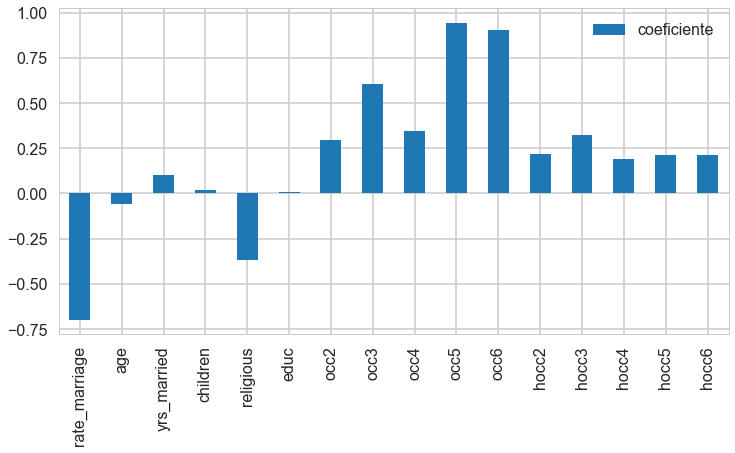

In [76]:
coeff_df.plot(kind='bar', figsize=(12,6))

##### O que podemos observar pelos coeficientes acima?

### Treinamento e validação

In [77]:
# Segmentando a base
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Instanciando um objeto
log_model2 = LogisticRegression()

# Treinando o modelo
log_model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [78]:
# Predizendo a classe das observações de teste
class_predict = log_model2.predict(X_test)

# Comparando as classes da predição e o gold, 
# ou seja, medindo a performance...
print (metrics.accuracy_score(y_test,class_predict))

0.7192211055276382


### Analise de resultados via matriz de confusão

In [79]:
# matriz de confusão
metrics.confusion_matrix(y_test, class_predict)

array([[973, 119],
       [328, 172]])

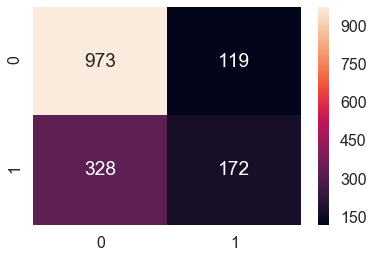

In [80]:
# Label gold na vertical, e label predição na horizontal
sns.heatmap(metrics.confusion_matrix(y_test, class_predict), annot=True, fmt ='d')

In [81]:
print(metrics.classification_report(y_test, class_predict))

             precision    recall  f1-score   support

          0       0.75      0.89      0.81      1092
          1       0.59      0.34      0.43       500

avg / total       0.70      0.72      0.69      1592



#### Quanto devemos acertar....

In [82]:
# se não sabemos nada da pessoa, o melhor 'chute' seria jogar uma moeda com 30% de probabilidade de cara (label = 1)
# 30% é a media do vetor y (arredondado)

# nesse caso teriamos:
print('prob. verdadeiro positivo:', 0.3 * 0.3)
print('prob. verdadeiro negativo:', 0.7 * 0.7)
print('prob. falso positivo:', 0.7 * 0.3)
print('prob. falso negativo:', 0.3 * 0.7)

prob. verdadeiro positivo: 0.09
prob. verdadeiro negativo: 0.48999999999999994
prob. falso positivo: 0.21
prob. falso negativo: 0.21


In [83]:
print('acuracia', 0.3 * 0.3 + 0.7 * 0.7)

acuracia 0.58


In [84]:
# Na realidade esse não é o melhor chute para maximizar a acuracia. 
# para maximizar a acuracia, o melhor chute seria 'chutar' tudo 0. 
# nesse caso teriamos:

print('prob. verdadeiro positivo:', 0.3 * 0)
print('prob. verdadeiro negativo:', 0.7 * 1)
print('prob. falso positivo:', 0.7 * 0)
print('prob. falso negativo:', 0.3 * 1)

prob. verdadeiro positivo: 0.0
prob. verdadeiro negativo: 0.7
prob. falso positivo: 0.0
prob. falso negativo: 0.3


In [85]:
print('acuracia', 0.3 * 0 + 0.7 * 1)

acuracia 0.7
